In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import string

In [2]:
gen_combined = pd.read_csv("../growth_rate/AR6_coal_generation.csv")
gen_combined = gen_combined[gen_combined["unit"].isin(['WITCH 5.0*EN_NPi2020_800', 'WITCH 5.0*EN_NPi2020_900'])==False]
# these have a wacky secondary energy | electricity (weirdly small)
gen_combined["Share_VRE_Gen"] = gen_combined["Share_Wind_Gen"]+gen_combined["Share_Solar_Gen"]
gen_combined["Solar_TWh"] = gen_combined["Solar_EJ/yr"]*277.778
gen_combined["Wind_TWh"] = gen_combined["Wind_EJ/yr"]*277.778
gen_combined["Coal_TWh"] = gen_combined["Coal_EJ/yr"]*277.778
gen_combined["Gas_TWh"] = gen_combined["Gas_EJ/yr"]*277.778
gen_combined["VRE_TWh"] = gen_combined["Solar_TWh"] + gen_combined["Wind_TWh"]
gen_combined["VRE_EJ/yr"] = gen_combined["Solar_EJ/yr"] + gen_combined["Wind_EJ/yr"]
C1_index = gen_combined[gen_combined["Category"]=="C1"].index
gen_combined.loc[C1_index,"Label"] = "1.5℃ (limited overshoot)"
C2_index = gen_combined[gen_combined["Category"]=="C2"].index
gen_combined.loc[C2_index,"Label"] = "1.5℃ (high overshoot)"
C3_index = gen_combined[gen_combined["Category"]=="C3"].index
gen_combined.loc[C3_index,"Label"] = "Likely below 2℃"

# PLOTTING
gen_combined["VRE_kTWh"] = gen_combined["VRE_TWh"]/1000
gen_combined["Coal_kTWh"] = gen_combined["Coal_TWh"]/1000
gen_combined["Gas_kTWh"] = gen_combined["Gas_TWh"]/1000

gen_combined

,Model,Scenario,Category,Region,Year,Coal_EJ/yr,Gas_EJ/yr,Solar_EJ/yr,Wind_EJ/yr,Electricity_EJ/yr,...,Solar_TWh,Wind_TWh,Coal_TWh,Gas_TWh,VRE_TWh,VRE_EJ/yr,Label,VRE_kTWh,Coal_kTWh,Gas_kTWh
0,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2005,7.47390,0.21190,0.00040,0.00740,9.6790,...,0.111111,2.055557,2076.084994,58.861158,2.166668,0.00780,1.5℃ (limited overshoot),0.002167,2.076085,0.058861
1,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2006,8.21882,0.25112,0.00624,0.10592,10.8015,...,1.733335,29.422246,2283.007382,69.755611,31.155580,0.11216,1.5℃ (limited overshoot),0.031156,2.283007,0.069756
2,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2007,8.96374,0.29034,0.01208,0.20444,11.9240,...,3.355558,56.788934,2489.929770,80.650065,60.144493,0.21652,1.5℃ (limited overshoot),0.060144,2.489930,0.080650
3,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2008,9.70866,0.32956,0.01792,0.30296,13.0465,...,4.977782,84.155623,2696.852157,91.544518,89.133405,0.32088,1.5℃ (limited overshoot),0.089133,2.696852,0.091545
4,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2009,10.45358,0.36878,0.02376,0.40148,14.1690,...,6.600005,111.522311,2903.774545,102.438971,118.122317,0.42524,1.5℃ (limited overshoot),0.118122,2.903775,0.102439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149147,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2096,0.00000,0.00000,13.52324,15.74336,54.2126,...,3756.458561,4373.159054,0.000000,0.000000,8129.617615,29.26660,Likely below 2℃,8.129618,0.000000,0.000000
149148,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2097,0.00000,0.00000,13.61468,15.84502,54.4273,...,3781.858581,4401.397966,0.000000,0.000000,8183.256547,29.45970,Likely below 2℃,8.183257,0.000000,0.000000
149149,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2098,0.00000,0.00000,13.70612,15.94668,54.6420,...,3807.258601,4429.636877,0.000000,0.000000,8236.895478,29.65280,Likely below 2℃,8.236895,0.000000,0.000000
149150,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2099,0.00000,0.00000,13.79756,16.04834,54.8567,...,3832.658622,4457.875789,0.000000,0.000000,8290.534410,29.84590,Likely below 2℃,8.290534,0.000000,0.000000


In [3]:
hist_gen = pd.read_csv("../growth_rate/combined_generation.csv")
hist_gen_r10 = hist_gen.groupby(["AR6_R10","Year"]).sum()
hist_gen_r10 = hist_gen_r10.drop(columns=["Code","Entity","ISO"])
hist_gen_r10["Share_VRE_Gen"] = hist_gen_r10["Share_Wind_Gen"]+hist_gen_r10["Share_Solar_Gen"]
hist_gen_r10["Electricity from VRE"] = hist_gen_r10["Electricity from solar (TWh)"] + hist_gen_r10["Electricity from wind (TWh)"]
hist_gen_r10["VRE_EJ"] = hist_gen_r10["Electricity from VRE"]/277.778
hist_gen_r10["Coal_EJ"] = hist_gen_r10["Electricity from coal (TWh)"]/277.778
hist_gen_r10["Gas_EJ"] = hist_gen_r10["Electricity from gas (TWh)"]/277.778
hist_gen_r10['Electricity from VRE (TWh)'] = hist_gen_r10[["Electricity from solar (TWh)","Electricity from wind (TWh)"]].sum(axis=1)
hist_gen_r10 = hist_gen_r10.reset_index()

# PLOTTING
hist_gen_r10['VRE (kTWh)'] = hist_gen_r10['Electricity from VRE (TWh)']/1000
hist_gen_r10['gas (kTWh)'] = hist_gen_r10['Electricity from gas (TWh)']/1000
hist_gen_r10['coal (kTWh)'] = hist_gen_r10['Electricity from coal (TWh)']/1000
hist_gen_r10

,AR6_R10,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Electricity generation (TWh),Share_Solar_Gen,Share_Wind_Gen,...,Share_Coal_Gen,Share_VRE_Gen,Electricity from VRE,VRE_EJ,Coal_EJ,Gas_EJ,Electricity from VRE (TWh),VRE (kTWh),gas (kTWh),coal (kTWh)
0,R10AFRICA,1990,0.000000,0.000000,8.449,16.4460,155.926,234.910500,0.000000,0.000000,...,0.932427,0.000000,0.000000,0.000000,0.561333,0.059206,0.000000,0.000000,0.016446,0.155926
1,R10AFRICA,1991,0.000000,0.000000,9.144,20.4065,155.388,238.142000,0.000000,0.000000,...,0.923192,0.000000,0.000000,0.000000,0.559396,0.073463,0.000000,0.000000,0.020407,0.155388
2,R10AFRICA,1992,0.000000,0.000000,9.288,22.9445,156.717,241.082000,0.000000,0.000000,...,0.932340,0.000000,0.000000,0.000000,0.564181,0.082600,0.000000,0.000000,0.022945,0.156717
3,R10AFRICA,1993,0.000000,0.000000,7.255,26.1725,165.960,250.767000,0.000000,0.000000,...,0.949939,0.000000,0.000000,0.000000,0.597456,0.094221,0.000000,0.000000,0.026172,0.165960
4,R10AFRICA,1994,0.000000,0.000000,9.697,29.2915,169.402,261.593000,0.000000,0.000000,...,0.932368,0.000000,0.000000,0.000000,0.609847,0.105449,0.000000,0.000000,0.029291,0.169402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,R10REST_ASIA,2018,17.740000,9.250000,136.370,582.4000,593.070,1666.900000,0.213105,0.121142,...,4.020899,0.334247,26.990000,0.097164,2.135050,2.096638,26.990000,0.026990,0.582400,0.593070
326,R10REST_ASIA,2019,22.990000,11.600000,147.750,594.7800,611.940,1700.100000,0.254776,0.153945,...,4.683103,0.408721,34.590000,0.124524,2.202982,2.141206,34.590000,0.034590,0.594780,0.611940
327,R10REST_ASIA,2020,28.850000,11.590000,162.220,553.5500,605.040,1673.550000,0.356871,0.151341,...,4.740239,0.508212,40.440000,0.145584,2.178142,1.992778,40.440000,0.040440,0.553550,0.605040
328,R10REST_ASIA,2021,35.270000,12.840000,166.260,605.5200,620.030,1769.790000,0.413050,0.151629,...,4.676928,0.564679,48.110000,0.173196,2.232106,2.179870,48.110000,0.048110,0.605520,0.620030


In [4]:
COP_recent = hist_gen_r10.query("Year==2022")[["AR6_R10","Year","VRE (kTWh)"]]
COP_recent = COP_recent.set_index("AR6_R10")
COP_trip_RE = COP_recent.copy()
COP_trip_RE["VRE (kTWh)"] = COP_recent["VRE (kTWh)"]*3
COP_trip_RE["Year"] = 2030
COP_trip_RE = COP_trip_RE.reset_index()
COP_trip_RE

,AR6_R10,Year,VRE (kTWh)
0,R10AFRICA,2030,0.106638
1,R10CHINA+,2030,3.769110
2,R10EUROPE,2030,2.362440
3,R10INDIA+,2030,0.518805
4,R10LATIN_AM,2030,0.577961
5,R10MIDDLE_EAST,2030,0.052582
6,R10NORTH_AM,2030,2.048370
7,R10PAC_OECD,2030,0.521700
8,R10REF_ECON,2030,0.068686
9,R10REST_ASIA,2030,0.165795


In [5]:
C1_c = "#96cfe3"#"#649B1C"
C2_c = "#778664"#"#00B593"
C3_c = "#707898"#"#4E84D4"
C_colors = [C1_c, C2_c, C3_c]
C_list = ["C1", "C2", "C3"]
select_regions = ['R10CHINA+','R10INDIA+','R10EUROPE','R10NORTH_AM']
tech_list = ["Coal","Gas","Wind+Solar"]

### IEA STEPS and APS scenario

In [6]:
coal_IEA = pd.read_csv("../../data/IEA/IEA_coal_generation_region.csv")
hist_data_coal = coal_IEA.query("Year==2022")
coal_IEA = pd.concat([coal_IEA,hist_data_coal.replace("Historical","STEPS")])
coal_IEA = pd.concat([coal_IEA,hist_data_coal.replace("Historical","APS")])

In [7]:
gas_IEA = pd.read_csv("../../data/IEA/IEA_gas_generation_region.csv")
hist_data_gas = gas_IEA.query("Year==2022")
gas_IEA = pd.concat([gas_IEA,hist_data_gas.replace("Historical","STEPS")])
gas_IEA = pd.concat([gas_IEA,hist_data_gas.replace("Historical","APS")])

In [8]:
solar_IEA = pd.read_csv("../../data/IEA/IEA_solar_generation_region.csv")
wind_IEA = pd.read_csv("../../data/IEA/IEA_wind_generation_region.csv")
vre_IEA = pd.merge(solar_IEA,wind_IEA,left_on = ["Region","Data_type","Year"],
                   right_on = ["Region","Data_type","Year"])

hist_data_vre = vre_IEA.query("Year==2022")
vre_IEA = pd.concat([vre_IEA,hist_data_vre.replace("Historical","STEPS")])
vre_IEA = pd.concat([vre_IEA,hist_data_vre.replace("Historical","APS")])
vre_IEA["VRE_Gen_TWh"] = vre_IEA["Solar_Gen_TWh"] + vre_IEA["Wind_Gen_TWh"]

In [9]:
iea_data = pd.merge(coal_IEA,gas_IEA,left_on = ["Region","Data_type","Year"],
                   right_on = ["Region","Data_type","Year"])
iea_data = pd.merge(iea_data,vre_IEA,left_on = ["Region","Data_type","Year"],
                   right_on = ["Region","Data_type","Year"])
# PLOTTING
iea_data["VRE_Gen_kTWh"] = iea_data["VRE_Gen_TWh"]/1000
iea_data["Coal_Gen_kTWh"] = iea_data["Coal_Gen_TWh"]/1000
iea_data["Gas_Gen_kTWh"] = iea_data["Gas_Gen_TWh"]/1000

iea_data

,Region,Coal_Gen_TWh,Data_type,Year,Gas_Gen_TWh,Solar_Gen_TWh,Wind_Gen_TWh,VRE_Gen_TWh,VRE_Gen_kTWh,Coal_Gen_kTWh,Gas_Gen_kTWh
0,World,8668.55,Historical,2010.0,4847.26,32.01,342.20,374.21,0.37421,8.66855,4.84726
1,North America,2106.01,Historical,2010.0,1216.54,3.35,105.11,108.46,0.10846,2.10601,1.21654
2,United States,1994.19,Historical,2010.0,1017.66,3.06,95.15,98.21,0.09821,1.99419,1.01766
3,Central and South America,41.26,Historical,2010.0,170.30,0.06,3.46,3.52,0.00352,0.04126,0.17030
4,Brazil,11.34,Historical,2010.0,36.47,0.00,2.18,2.18,0.00218,0.01134,0.03647
...,...,...,...,...,...,...,...,...,...,...,...
139,Asia Pacific,8175.79,APS,2022.0,1442.50,749.61,911.74,1661.35,1.66135,8.17579,1.44250
140,China,5536.03,APS,2022.0,257.20,429.15,762.39,1191.54,1.19154,5.53603,0.25720
141,India,1270.29,APS,2022.0,39.41,105.26,79.35,184.61,0.18461,1.27029,0.03941
142,Japan,333.49,APS,2022.0,358.68,94.68,9.58,104.26,0.10426,0.33349,0.35868


In [10]:
iea_data["Region"].unique()

array(['World', 'North America', 'United States',
       'Central and South America', 'Brazil', 'Europe', 'European Union',
       'Africa', 'Middle East', 'Eurasia', 'Russia', 'Asia Pacific',
       'China', 'India', 'Japan', 'Southeast Asia'], dtype=object)

# visualisation

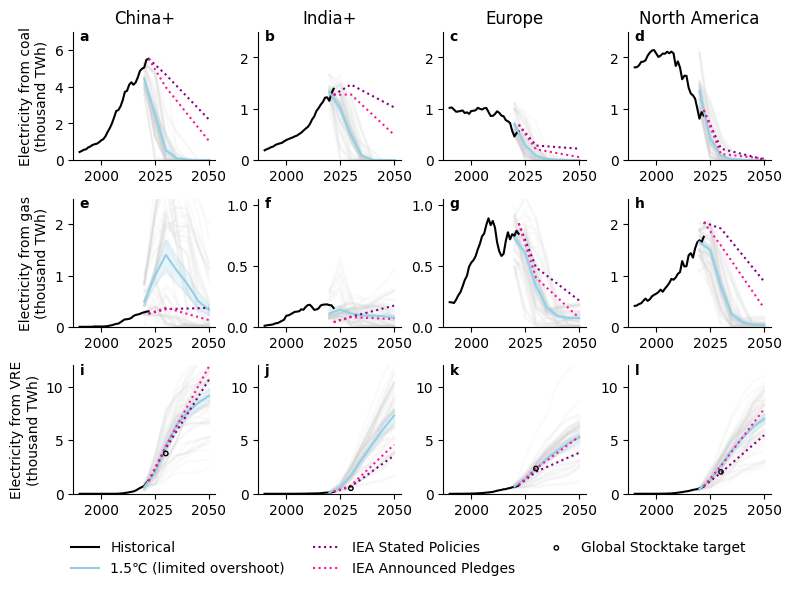

In [11]:
IEA_names = ["China","India","Europe","North America"]
title_names = ["China+","India+","Europe","North America"]
var_names = ['coal (kTWh)','gas (kTWh)',"VRE (kTWh)"]
var_names_AR6 = ['Coal_kTWh','Gas_kTWh','VRE_kTWh']
var_names_IEA = ['Coal_Gen_kTWh','Gas_Gen_kTWh',"VRE_Gen_kTWh"]
ylabel_names = ['Electricity from coal\n(thousand TWh)','Electricity from gas\n(thousand TWh)','Electricity from VRE\n(thousand TWh)']
ylim_list = [[7,2.5,2.5,2.5],[2.5,1.05,1.05,2.5],[12,12,12,12]]
             
fig, axes = plt.subplots(3,4,figsize=(9,6))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

count = 0
for var_name in var_names:
    m = var_names.index(var_name)
    var_name_AR6 = var_names_AR6[m]
    var_name_IEA = var_names_IEA[m]
    ylabel_name = ylabel_names[m]
    ylim_var = ylim_list[m]
    for reg in select_regions:
        i = select_regions.index(reg)
        ylim = ylim_var[i]
        plot_data = gen_combined.query("Region==@reg").query("Category=='C1'")
        plot_data = plot_data[plot_data["Year"]>=2020]
        plot_data = plot_data[plot_data["Year"]<=2050]
        hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
        this_ax = axes[m,i]
        
        # historical data
        sns.lineplot(x="Year", y=var_name,color="black",data=hist_plot_data,ax=this_ax,label="Historical")
        
        # projection data
        sns.lineplot(x="Year",y=var_name_AR6,data=plot_data,color="lightgray",
                     units="unit",estimator=None,alpha=0.1,zorder=1,legend=None,ax=this_ax)
        sns.lineplot(x="Year", y=var_name_AR6,color=C_colors[0],data=plot_data,ax=this_ax,label=plot_data["Label"].iloc[0])

        # IEA data
        IEA_reg = IEA_names[i]
        sns.lineplot(x="Year", y=var_name_IEA,color="purple",data=iea_data.query("Region==@IEA_reg").query("Data_type=='STEPS'"),
                     linestyle=':',ax=this_ax,label="IEA Stated Policies")
        sns.lineplot(x="Year", y=var_name_IEA,color="deeppink",data=iea_data.query("Region==@IEA_reg").query("Data_type=='APS'"),
                     linestyle=':',ax=this_ax,label="IEA Announced Pledges")

        # tripling renewable
        if m == 2:
            this_ax.scatter(2030,COP_trip_RE.query("AR6_R10==@reg")["VRE (kTWh)"],edgecolors="black",facecolor="none",
                            s=10,marker="o",label="Global Stocktake target", zorder=10)
        
        this_ax.spines['top'].set_visible(False)
        this_ax.spines['right'].set_visible(False)
        if m == 0:
            this_ax.set_title(title_names[i])
        this_ax.set_ylim([0,ylim])
        this_ax.set_xlabel(None)
        if i != 0:
            this_ax.set_ylabel(None)
        else:
            this_ax.set_ylabel(ylabel_name)
            
        if i != 3 or m != 2:
            this_ax.get_legend().remove()
        
        this_ax.text(1990,ylim*0.93,string.ascii_lowercase[count], weight='bold')
        count = count + 1
            
axes[2,3].legend(loc='center left', bbox_to_anchor=(-4, -0.5),frameon=False,ncol=3)

fig.savefig("Fig1_compare_AR6.png",dpi=600, bbox_inches='tight')
fig.savefig("Fig1_compare_AR6.pdf", bbox_inches='tight')